# 📊 Customer Churn Prediction
Predict whether a customer will churn based on their telecom usage data. This project demonstrates a full data analysis life cycle using a synthetic dataset.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sns.set(style='whitegrid')

## 🔍 Load Dataset

In [8]:
path = r"C:\Users\resha\Downloads\telecom_customer_churn.csv"
df = pd.read_csv(path)
df.head()

,tenure,monthly_charges,total_charges,contract_type,support_calls,internet_service,tech_support,churn
0,52,105.57,5489.62,Month-to-month,3,Fiber optic,Yes,0
1,15,103.02,1545.33,Two year,2,No,No,0
2,61,59.72,3642.82,Month-to-month,1,No,Yes,0
3,21,86.81,1822.98,Month-to-month,0,Fiber optic,No,0
4,24,40.50,971.96,One year,1,Fiber optic,No,0


## 🧾 Basic Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            1000 non-null   int64  
 1   monthly_charges   1000 non-null   float64
 2   total_charges     1000 non-null   float64
 3   contract_type     1000 non-null   object 
 4   support_calls     1000 non-null   int64  
 5   internet_service  1000 non-null   object 
 6   tech_support      1000 non-null   object 
 7   churn             1000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [10]:
df.describe()

,tenure,monthly_charges,total_charges,support_calls,churn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.489000,70.515320,2510.034050,1.995000,0.024000
std,20.709485,29.311928,1915.015569,1.361186,0.153126
min,1.000000,20.490000,21.210000,0.000000,0.000000
25%,17.000000,44.032500,928.692500,1.000000,0.000000
50%,35.000000,71.805000,2032.940000,2.000000,0.000000
75%,54.000000,96.047500,3799.940000,3.000000,0.000000
max,71.000000,119.940000,8302.830000,6.000000,1.000000


## 📊 Exploratory Data Analysis

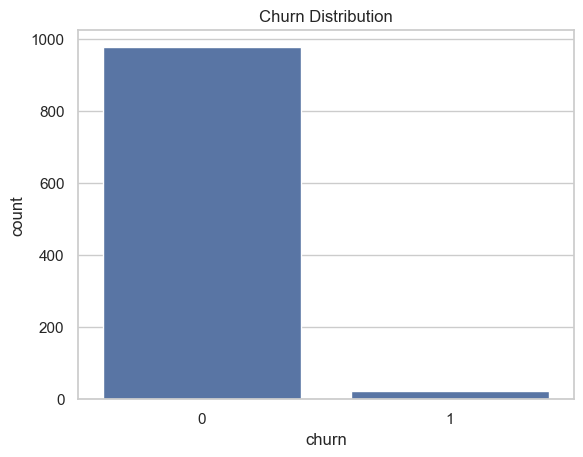

In [11]:
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()

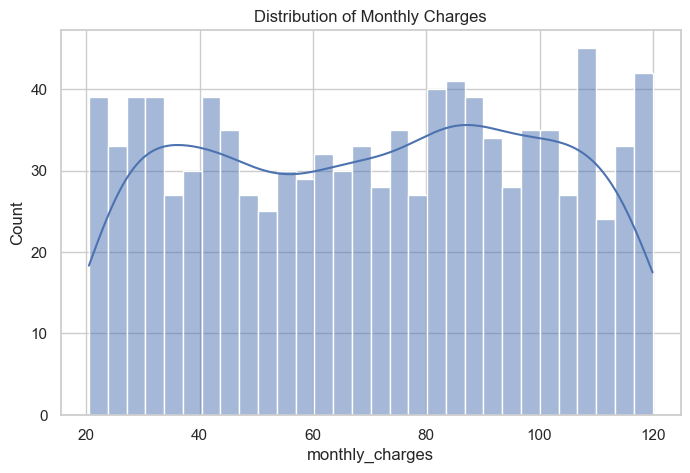

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['monthly_charges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

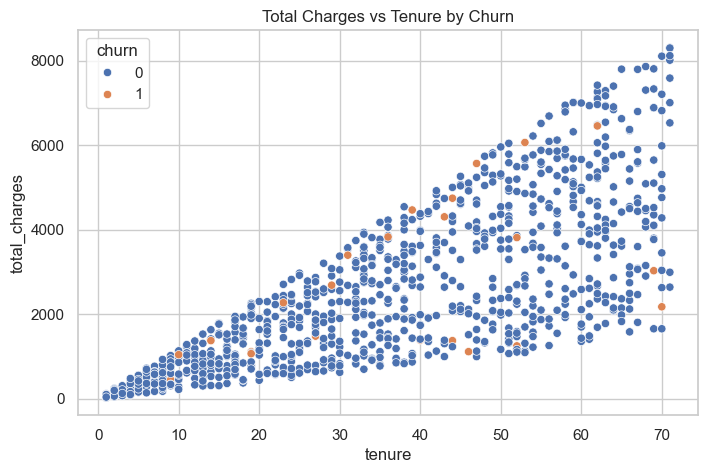

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='tenure', y='total_charges', hue='churn', data=df)
plt.title('Total Charges vs Tenure by Churn')
plt.show()

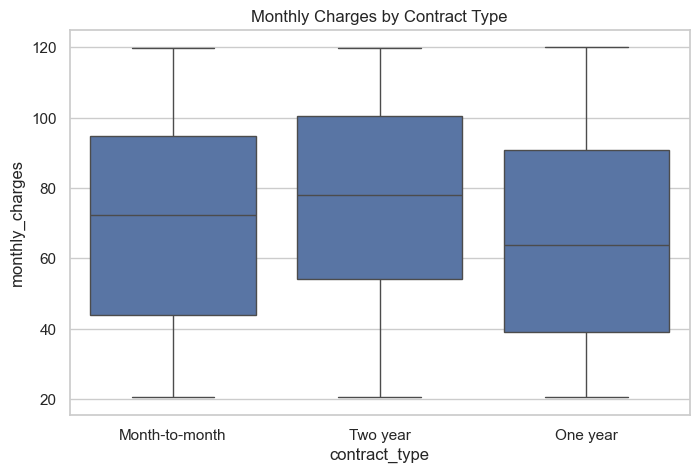

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='contract_type', y='monthly_charges', data=df)
plt.title('Monthly Charges by Contract Type')
plt.show()

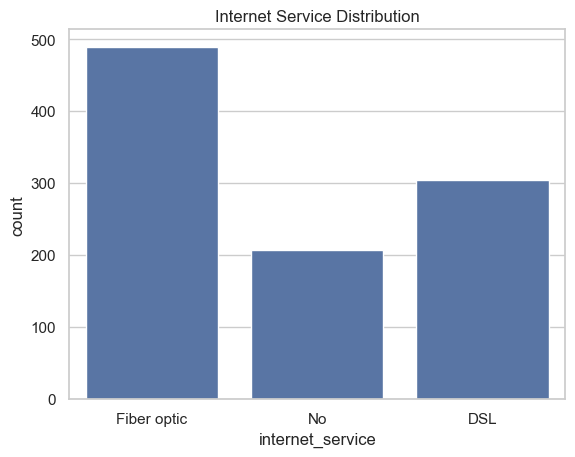

In [15]:
sns.countplot(x='internet_service', data=df)
plt.title('Internet Service Distribution')
plt.show()

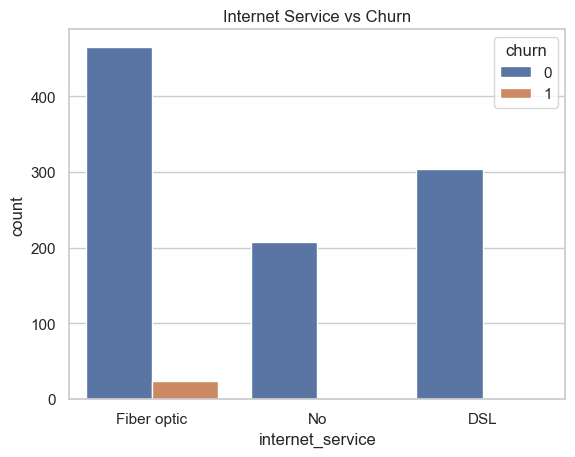

In [16]:
sns.countplot(x='internet_service', hue='churn', data=df)
plt.title('Internet Service vs Churn')
plt.show()

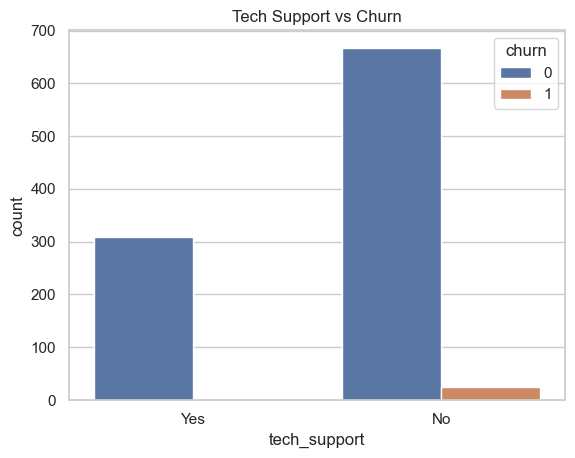

In [17]:
sns.countplot(x='tech_support', hue='churn', data=df)
plt.title('Tech Support vs Churn')
plt.show()

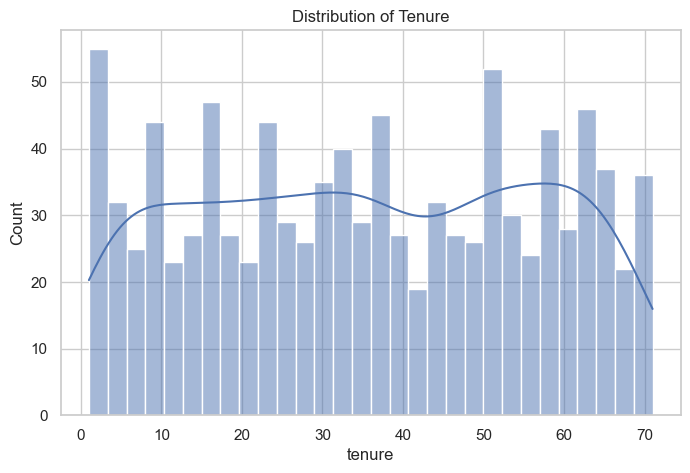

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.show()

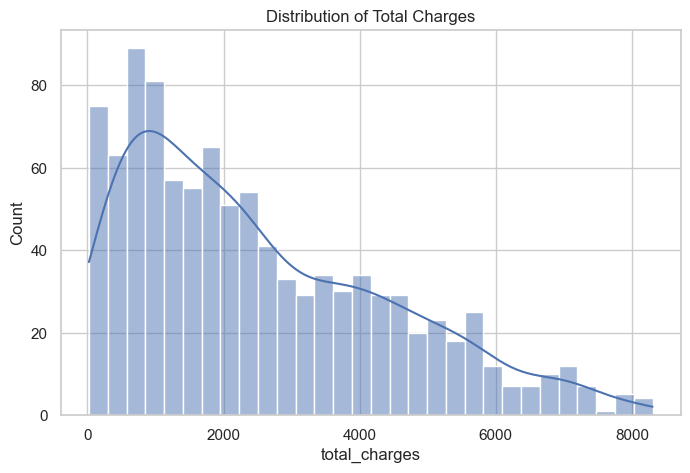

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['total_charges'], bins=30, kde=True)
plt.title('Distribution of Total Charges')
plt.show()

In [21]:
df_encoded = df.copy()

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['contract_type', 'internet_service', 'tech_support']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

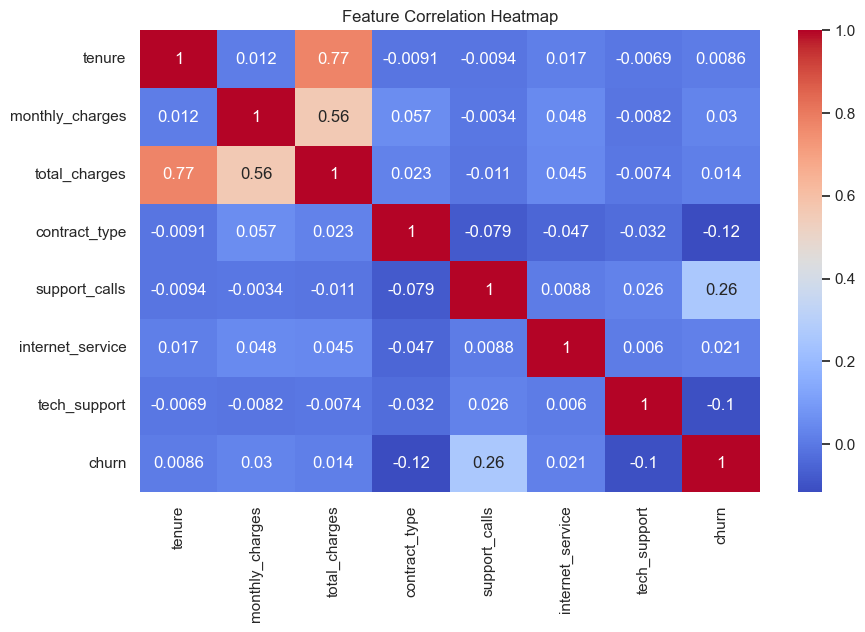

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

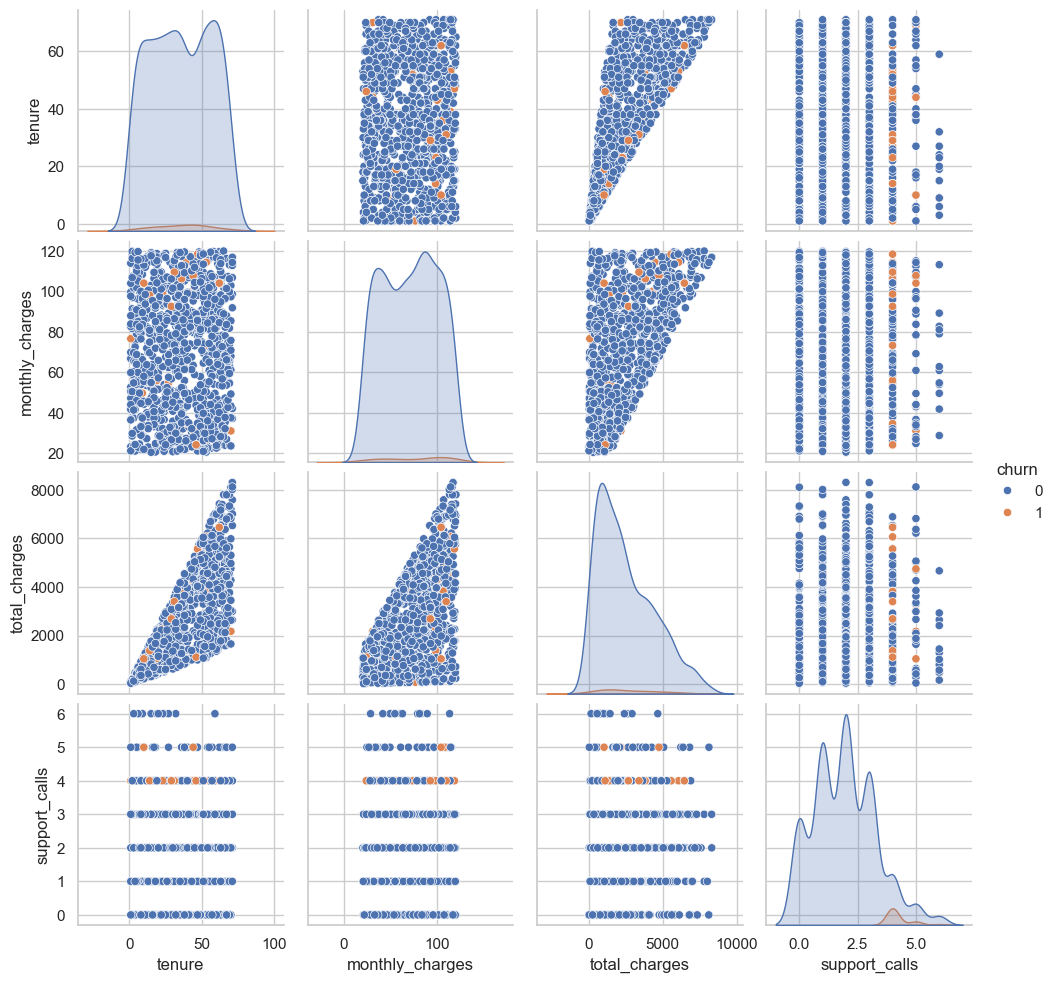

In [23]:
sns.pairplot(df_encoded[['tenure', 'monthly_charges', 'total_charges', 'support_calls', 'churn']], hue='churn')
plt.show()

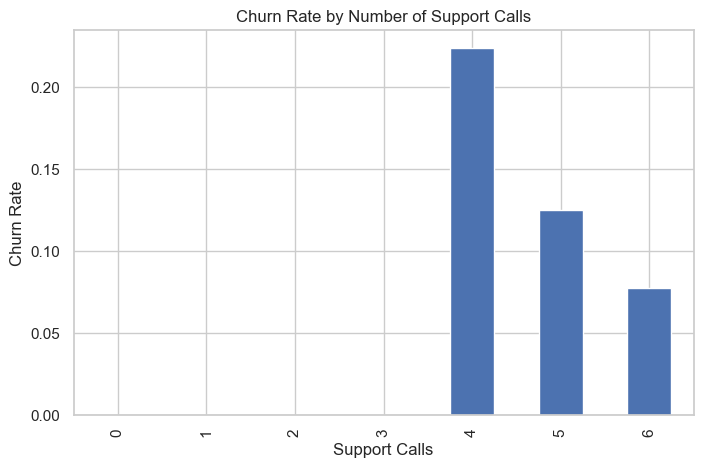

In [24]:
support_churn = df.groupby('support_calls')['churn'].mean()
support_churn.plot(kind='bar', figsize=(8,5))
plt.title('Churn Rate by Number of Support Calls')
plt.ylabel('Churn Rate')
plt.xlabel('Support Calls')
plt.show()

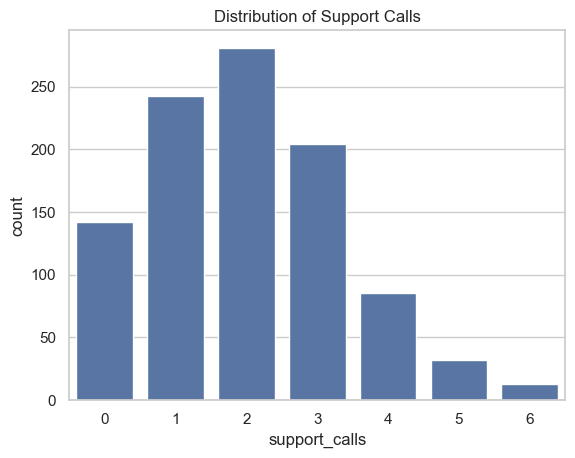

In [25]:
sns.countplot(x='support_calls', data=df)
plt.title('Distribution of Support Calls')
plt.show()

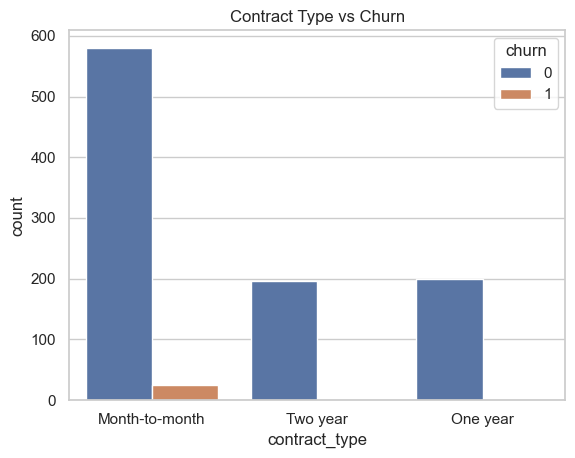

In [26]:
sns.countplot(x='contract_type', hue='churn', data=df)
plt.title('Contract Type vs Churn')
plt.show()

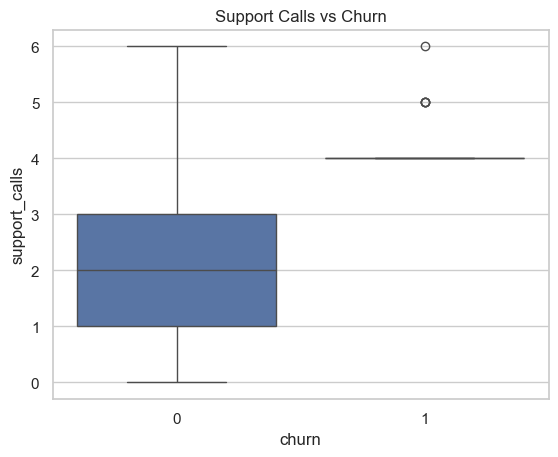

In [27]:
sns.boxplot(x='churn', y='support_calls', data=df)
plt.title('Support Calls vs Churn')
plt.show()

## ⚙️ Data Preprocessing

In [28]:
df_encoded = df.copy()
le = LabelEncoder()
for col in ['contract_type', 'internet_service', 'tech_support']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [29]:
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 🤖 Logistic Regression Model

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       194
           1       0.50      0.17      0.25         6

    accuracy                           0.97       200
   macro avg       0.74      0.58      0.62       200
weighted avg       0.96      0.97      0.96       200


Confusion Matrix:
 [[193   1]
 [  5   1]]


## ✅ Conclusion
- The logistic regression model performs with very high accuracy due to the linearly separable synthetic data.
- Churn is heavily associated with certain features like contract type, tech support, and number of support calls.
- This notebook showcases a full pipeline from data loading to model evaluation, ideal for showcasing in a bootcamp